# C9orf72 age at onset analysis
This notebook contains the source code to perform the age at onset analysis of the c9orf72 manuscript. The source data and analysis exist in the original folders but I want to create a folder to keep the essential data and code for Github and future references.

## Leave one out analysis and high resolution genetic risk score

### Leave one out analysis

In [3]:
%%bash 
cd /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO
# The file contains a list of 161 --score file excluding one SNP at a time 
head LOO.161snps.txt

module load R/4.0.0
R --vanilla --no-save
require(dplyr)
require(tidyverse)
require(ggplot2)
require(data.table)
require(RColorBrewer)



listOfProfiles <- read.table("LOO.161snps.txt", header = T)
names(listOfProfiles) <- c("id")
covs = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
covs$index <- covs$FID_IID
covs$CASE <- covs$PHENO - 1
covs = filter (covs, diagnosis2 == "Case_EXP" |diagnosis2 == "Control_WT" | diagnosis2 == "Control_EXP")
outPut <- matrix(ncol = 4, nrow = length(listOfProfiles$id), NA)
colnames(outPut) <- c("removedSNP","b","se","p")
for(i in 1:length(listOfProfiles$id))
{
	profileName <- 	as.character(listOfProfiles$id[i])
	profile <- fread(file = paste(profileName, ".loo.txt.profile", sep = ""), header = T)
	profile$index <- paste(profile$FID)
	data <- merge(covs, profile, by = "index")
	meanControls <- mean(data$SCORE[data$CASE == 0])
	sdControls <- sd(data$SCORE[data$CASE == 0])
	data$zSCORE <- (data$SCORE - meanControls)/sdControls	
	grsTest <- glm(CASE ~ zSCORE + age_at_onset + gender + dataset + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20, family="binomial", data = data)
	beta <- summary(grsTest)$coefficients["zSCORE","Estimate"]
	se <- summary(grsTest)$coefficients["zSCORE","Std. Error"]
	p <- summary(grsTest)$coefficients["zSCORE","Pr(>|z|)"]
	outPut[i,1] <- profileName
	outPut[i,2] <- beta
	outPut[i,3] <- se
	outPut[i,4] <- p
}
write.table(outPut, "updatedLOO.161snps.C9carriers.RISK.tab", quote = F, sep = "\t", row.names = F)


listOfProfiles <- read.table("LOO.161snps.txt", header = T)
names(listOfProfiles) <- c("id")
covs = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
covs$index <- covs$FID_IID
covs$CASE <- covs$PHENO - 1
covs = filter (covs, diagnosis2 == "Case_EXP")
outPut <- matrix(ncol = 4, nrow = length(listOfProfiles$id), NA)
colnames(outPut) <- c("removedSNP","b","se","p")
for(i in 1:length(listOfProfiles$id))
{
	profileName <- 	as.character(listOfProfiles$id[i])
	profile <- fread(file = paste(profileName, ".loo.txt.profile", sep = ""), header = T)
	profile$index <- paste(profile$FID)
	data <- merge(covs, profile, by = "index")
	meanControls <- mean(data$SCORE[data$CASE == 0])
	sdControls <- sd(data$SCORE[data$CASE == 0])
	data$zSCORE <- (data$SCORE - meanControls)/sdControls	
	grsTest <- glm(age_at_onset ~ zSCORE + age_at_onset + gender +  PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20,  data = data)
	beta <- summary(grsTest)$coefficients["zSCORE","Estimate"]
	se <- summary(grsTest)$coefficients["zSCORE","Std. Error"]
	p <- summary(grsTest)$coefficients["zSCORE","Pr(>|z|)"]
	outPut[i,1] <- profileName
	outPut[i,2] <- beta
	outPut[i,3] <- se
	outPut[i,4] <- p
}

write.table(outPut, "updatedLOO.161snps.C9carriers.AA0.LAST.tab", quote = F, sep = "\t", row.names = F)





rs12138742.txt
rs10067826.txt
rs10488631.txt
rs72733862.txt
rs118072482.txt
rs77058105.txt
rs3109207.txt
rs116946806.txt
rs118071175.txt
rs12991146.txt


[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn1007 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.16.2  on cn1007 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.0 



R version 4.0.0 (2020-04-24) -- "Arbor Day"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> require(dplyr)


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
package ‘dplyr’ was built under R version 4.0.3 
Loading required package: tidyverse


> require(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.0
✔ readr   2.1.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: package ‘ggplot2’ was built under R version 4.0.3 
2: package ‘tibble’ was built under R version 4.0.3 
3: package ‘tidyr’ was built under R version 4.0.3 
4: package ‘readr’ was built under R version 4.0.3 


> require(ggplot2)
> require(data.table)


Loading required package: data.table

Attaching package: ‘data.table’

The following object is masked from ‘package:purrr’:

    transpose

The following objects are masked from ‘package:dplyr’:

    between, first, last

Warning message:
package ‘data.table’ was built under R version 4.0.3 
Loading required package: RColorBrewer


> require(RColorBrewer)
> 
> 
> listOfProfiles <- read.table("LOO.161snps.txt", header = T)
> names(listOfProfiles) <- c("id")
> covs = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
> covs$index <- covs$FID_IID
> covs$CASE <- covs$PHENO - 1
> covs = filter (covs, diagnosis2 == "Case_EXP" |diagnosis2 == "Control_WT" | diagnosis2 == "Control_EXP")
> outPut <- matrix(ncol = 4, nrow = length(listOfProfiles$id), NA)
> colnames(outPut) <- c("removedSNP","b","se","p")
> for(i in 1:length(listOfProfiles$id))
+ {
+ 	profileName <- 	as.character(listOfProfiles$id[i])
+ 	profile <- fread(file = paste(profileName, ".loo.txt.profile", sep = ""), header = T)
+ 	profile$index <- paste(profile$FID)
+ 	data <- merge(covs, profile, by = "index")
+ 	meanControls <- mean(data$SCORE[data$CASE == 0])
+ 	sdControls <- sd(data$SCORE[data$CASE == 0])
+ 	data$zSCORE <- (data$SCORE - meanControls)/sdControls	
+ 	grsTest <- glm


Execution halted


Process is interrupted.


### Calculate deciles

In [10]:
%%bash 
cd /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO


module load R/4.0.0
R --vanilla --no-save
require(dplyr)
require(tidyverse)
require(ggplot2)
require(data.table)
require(RColorBrewer)



files <- fread("deciles.txt", header = F)
names(files) <- c("id")
scores = fread("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Results/Merged.162.RISK.profile", header = F)
scores$SNP = scores$V1
for(i in 1:length(files$id))
{
fileName <- as.character(files$id[i])
data = fread(file = paste(fileName), header = T)
labels <- select(data, pathway)
labels <- separate(labels, pathway, c("SNP"))
binded = cbind(data, labels)
merged = merge(scores, binded, by = "SNP")
merged  <- select(merged, SNP, b, se, p, V2, V3)
temp <- merged %>% mutate(decile = ntile(b, 10))
write.table(temp, file = paste(fileName, ".toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F)
temp1 = filter(temp, decile == "1")
temp1 = select(temp1, SNP, V2, V3)
temp2 = filter(temp, decile == "2")
temp2 = select(temp2, SNP, V2, V3)
temp3 = filter(temp, decile == "3")
temp3 = select(temp3, SNP, V2, V3)
temp4 = filter(temp, decile == "4")
temp4 = select(temp4, SNP, V2, V3)
temp5 = filter(temp, decile == "5")
temp5 = select(temp5, SNP, V2, V3)
temp6 = filter(temp, decile == "6")
temp6 = select(temp6, SNP, V2, V3)
temp7 = filter(temp, decile == "7")
temp7 = select(temp7, SNP, V2, V3)
temp8 = filter(temp, decile == "8")
temp8 = select(temp8, SNP, V2, V3)
temp9 = filter(temp, decile == "9")
temp9 = select(temp9, SNP, V2, V3)
temp10 = filter(temp, decile == "10")
temp10 = select(temp10, SNP, V2, V3)
write.table(temp1, file = paste(fileName, ".udecile1.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp2, file = paste(fileName, ".udecile2.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp3, file = paste(fileName, ".udecile3.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp4, file = paste(fileName, ".udecile4.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp5, file = paste(fileName, ".udecile5.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp6, file = paste(fileName, ".udecile6.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp7, file = paste(fileName, ".udecile7.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp8, file = paste(fileName, ".udecile8.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp9, file = paste(fileName, ".udecile9.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp9, file = paste(fileName, ".udecile9.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
write.table(temp10, file = paste(fileName, ".udecile10.toscore.txt", sep = ""), quote = F, sep = "\t", row.names = F, col.names = F)
}




R version 4.0.0 (2020-04-24) -- "Arbor Day"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> require(dplyr)
> require(tidyverse)
> require(ggplot2)
> require(data.table)
> require(RColorBrewer)
> 
> 
> 
> files <- fread("deciles.txt", header = F)
> names(files) <- c("id")
> scores = fread("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Results/Merged.162.RISK.profile", header = F)
> scores$SNP

[-] Unloading gcc  9.2.0  ... 
[-] Unloading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading openmpi 4.0.5  for GCC 9.2.0 
[-] Unloading ImageMagick  7.0.8  on cn0627 
[-] Unloading HDF5  1.10.4 
[-] Unloading NetCDF 4.7.4_gcc9.2.0 
[-] Unloading pandoc  2.13  on cn0627 
[-] Unloading pcre2 10.21  ... 
[-] Unloading R 4.0.5 
[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn0627 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.13  on cn0627 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.0 

The following have been reloaded with a version change:
  1) R/4.0 => R/4.0.0

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package

In [2]:
%%bash 
cd /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO


echo "LOO.161snps.C9carriers.AAO.tab.decile10.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile10.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile9.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile8.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile7.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile6.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile5.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile4.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile3.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile2.toscore.txt
LOO.161snps.C9carriers.AAO.tab.udecile1.toscore.txt" > CARRIERS.AAO.udecilestoscore.txt

In [1]:
%%bash
scp /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/ToScore.162merged.tab /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO
cd /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO
#scp ToScore.162merged.tab LOO.161snps.C9carriers.RISK.tab.all.toscore.txt
#scp ToScore.162merged.tab LOO.161snps.C9carriers.AAO.tab.all.toscore.txt
#scp ToScore.162merged.tab LOO.161snps.NONcarriers.RISK.tab.all.toscore.txt


### Forest plot 10 deciles. Figure 3a
I added the color in Inkscape.

In [2]:
%%bash
cd /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/

# /data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/forestplot.NONCarriers.RISKofcarriers.risk.svg  


module load R/4.0.3
R --vanilla --no-save
 
#load packages
require(data.table)
require(tidyverse)
library(meta)
 
data <- fread("updated.Carriers.AAO.DECILES.tab",header=T)
head(data)
labels <- select(data, pathway)
labels <- separate(labels, pathway, c("a", "b", "c", "d", "e", "f"))
head(labels)
labels <- labels %>% mutate (SNP = ifelse(f == "decile1", "Decile 10", 
                                                        ifelse(f == "decile2", "Decile 9",
                                                               ifelse(f == "decile3", "Decile 8",
                                                                 ifelse(f == "decile4", "Decile 7",
                                                                 ifelse(f == "decile5", "Decile 6",
                                                                  ifelse(f == "decile6", "Decile 5",
                                                                  ifelse(f == "decile7", "Decile 4",
                                                                  ifelse(f == "decile8", "Decile 3",
                                                                 ifelse(f == "decile9", "Decile 2",
                                                                 ifelse(f == "decile10", "Decile 1","no")))))))))))
head(labels)



labels <- select(labels, SNP)
binded = cbind(data, labels)

# Plot
input <- binded 
input$BETA <- input$b
input$SE <- input$se
sumstats <- input
m <- metagen(BETA,
             SE,
             data=sumstats,
             studlab=SNP,
             comb.fixed = TRUE,
             comb.random = TRUE,
             prediction=FALSE,
             level.ci = 0.95,
             sm="BETA")
             
m 
  
      
svg(file = '/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/forestplot.Metaanalysis.Figure3.beta.svg')        
 forest(m,
       layout = "JAMA",
         leftlabs=c("Dataset", "Beta" , "(95% CI)"),
         smlab = "Beta",
        ref = 0,
    squaresize = 0.5,
                      col.square = "grey",
                      col.square.lines = "black",
                      col.diamond.fixed = "#50b0cb",
                    text.fixed = "Summary (Fixed Effects)",
                      text.random = "Summary (Random Effects)",
                      cex = 12,
                      ff.fixed = "bold",
                      ff.fixed.labels = "bold",
                      fs.hetstat = 15,
                      just.addcols = "center",
                      spacing = 1.25,
                      colgap.forest.left = unit(10,"mm"),
                      colgap.forest.right = unit(15,"mm"),
                      colgap.studlab = unit(10,"mm"),
                      plotwidth = unit(70,"mm"))
dev.off()           



[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn1007 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.16.2  on cn1007 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.3 



R version 4.0.3 (2020-10-10) -- "Bunny-Wunnies Freak Out"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

>  
> #load packages
> require(data.table)


Loading required package: data.table


> require(tidyverse)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


> library(meta)


Loading 'meta' package (version 4.18-0).
Type 'help(meta)' for a brief overview.


>  
> data <- fread("updated.Carriers.AAO.DECILES.tab",header=T)
> head(data)
                                               pathway           b        se
1: LOO.161snps.C9carriers.AAO.tab.decile10.toscore.txt -2.23849551 0.3292677
2:  LOO.161snps.C9carriers.AAO.tab.decile9.toscore.txt -1.40316416 0.3341458
3:  LOO.161snps.C9carriers.AAO.tab.decile8.toscore.txt -1.07487654 0.3348254
4:  LOO.161snps.C9carriers.AAO.tab.decile7.toscore.txt -0.70302937 0.3358916
5:  LOO.161snps.C9carriers.AAO.tab.decile6.toscore.txt -0.40968780 0.3394575
6:  LOO.161snps.C9carriers.AAO.tab.decile5.toscore.txt  0.04757516 0.3411225
              p
1: 2.080559e-11
2: 2.981485e-05
3: 1.379552e-03
4: 3.666420e-02
5: 2.278345e-01
6: 8.891170e-01
> labels <- select(data, pathway)
> labels <- separate(labels, pathway, c("a", "b", "c", "d", "e", "f"))


Warning message:
Expected 6 pieces. Additional pieces discarded in 11 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]. 


> head(labels)
     a       b          c   d   e        f
1: LOO 161snps C9carriers AAO tab decile10
2: LOO 161snps C9carriers AAO tab  decile9
3: LOO 161snps C9carriers AAO tab  decile8
4: LOO 161snps C9carriers AAO tab  decile7
5: LOO 161snps C9carriers AAO tab  decile6
6: LOO 161snps C9carriers AAO tab  decile5
> labels <- labels %>% mutate (SNP = ifelse(f == "decile1", "Decile 10", 
+                                                         ifelse(f == "decile2", "Decile 9",
+                                                                ifelse(f == "decile3", "Decile 8",
+                                                                  ifelse(f == "decile4", "Decile 7",
+                                                                  ifelse(f == "decile5", "Decile 6",
+                                                                   ifelse(f == "decile6", "Decile 5",
+                                                                   ifelse(f == "decile7", "Decile 4",
+      

### Regression of decile ONE and TEN. Figure 3b

In [2]:

%%bash

module load R/4.0.0
R --vanilla --no-save
require(dplyr)
require(tidyverse)
require(ggplot2)
require(data.table)
require(RColorBrewer)
setwd("Merged.toPLOT.LOCAL.2021-04-11.GRS")



############################################# OPEN .PROFILE AND COVARIATES FILES ##################################################

profile= read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/LOO.161snps.C9carriers.AAO.tab.decile10.toscore.txt.deciles.txt.profile", header = T)

profile$FID_IID = profile$FID
#PHENO FILE 
pheno = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
dim(pheno)




#merge pheno with profile
data = merge(profile,pheno, by= "FID_IID")

table(data$diagnosis3)
table(data$diagnosis2)
#Case_EXP, Case_WT, Control_EXP, Control_WT
table(data$diagnosis4)

dim(data)
data$PHENO = data$PHENO.x

# REGRESSION C9ORF72CARRIERS using GRS without C9orf72
#dataCARRIERS = filter (data, diagnosis2 == "Case_EXP" |diagnosis2 == "Control_WT" | diagnosis2 == "Control_EXP")

table(data$diagnosis3)
table(data$diagnosis2)
table(data$diagnosis4)


# from now, control includes all controls (it means 1 exp control)

data <- data %>% mutate (diagnosis5 = ifelse(diagnosis2 == "Case_EXP", "Case_EXP", 
                                                        ifelse(diagnosis2 == "Case_WT", "Case_WT",
                                                               ifelse(diagnosis3 == "Control", "Control","no"))))
                                                                 



data3groups = filter(data, diagnosis5 == "Case_EXP" |diagnosis5 == "Case_WT" | diagnosis5 == "Control")

dim(data3groups)

data3groups = filter(data3groups, age_at_onset > 1)
dim(data3groups)

data3groups$CASE <- data3groups$PHENO - 1
meanControls <- mean(data3groups$SCORE[data3groups$CASE == 0])
sdControls <- sd(data3groups$SCORE[data3groups$CASE == 0])
data3groups$SCOREZ <- (data3groups$SCORE - meanControls)/sdControls






   
dataplot = filter(data3groups, diagnosis2 == "Case_EXP"  | diagnosis2 == "Case_WT")



      p = ggplot(dataplot, aes(x=age_at_onset, y= SCOREZ, colour= diagnosis2)) 
      
      p1 = p + geom_point(alpha = 0, size = 0.8)+ stat_smooth(method=lm, fullrange = T, 
      level=0.90, alpha = 1/5, size=2)  
      p3 = p1 + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), axis.line = element_line(colour = "black")) 
              
p2 = p3 + scale_color_manual(values=c('#c7c7c7', '#dc122a'), breaks=c("Case_WT","Case_EXP"), 
labels=c("Non carriers", "C9orf72 carriers")) 

p4 = p2  + theme_classic(base_size = 45) + coord_cartesian(ylim = c(-2, 2)) +
ylab("GRS common ALS risk") + xlab("Age at onset") 
#ggsave(filename = "/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/DECILE10.updated.LinealRegressioplot.Merged.AAO.162.1.1.png", 
#width = 55, height = 35, dpi = 300, units = "cm", plot = p4)  






[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn0912 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.17.1.1  on cn0912 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.0 



R version 4.0.0 (2020-04-24) -- "Arbor Day"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> require(dplyr)


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
package ‘dplyr’ was built under R version 4.0.3 


> require(tidyverse)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.0
✔ readr   2.1.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: package ‘ggplot2’ was built under R version 4.0.3 
2: package ‘tibble’ was built under R version 4.0.3 
3: package ‘tidyr’ was built under R version 4.0.5 
4: package ‘readr’ was built under R version 4.0.3 


> require(ggplot2)
> require(data.table)


Loading required package: data.table

Attaching package: ‘data.table’

The following object is masked from ‘package:purrr’:

    transpose

The following objects are masked from ‘package:dplyr’:

    between, first, last

Warning message:
package ‘data.table’ was built under R version 4.0.3 
Loading required package: RColorBrewer


> require(RColorBrewer)
> setwd("Merged.toPLOT.LOCAL.2021-04-11.GRS")
> 
> 
> 
> ############################################# OPEN .PROFILE AND COVARIATES FILES ##################################################
> 
> profile= read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/LOO.161snps.C9carriers.AAO.tab.decile10.toscore.txt.deciles.txt.profile", header = T)
> 
> profile$FID_IID = profile$FID
> #PHENO FILE 
> pheno = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
> dim(pheno)
[1] 42090    38
> 
> 
> 
> 
> #merge pheno with profile
> data = merge(profile,pheno, by= "FID_IID")
> 
> table(data$diagnosis3)

   Case Control 
   7854   34236 
> table(data$diagnosis2)

   Case_EXP     Case_WT Control_EXP  Control_WT 
        817        7037           1       34235 
> #Case_EXP, Case_WT, Control_EXP, Control_WT
> table(data$diagnosis4)

    ALS Control     FTD 
   7703   34236   

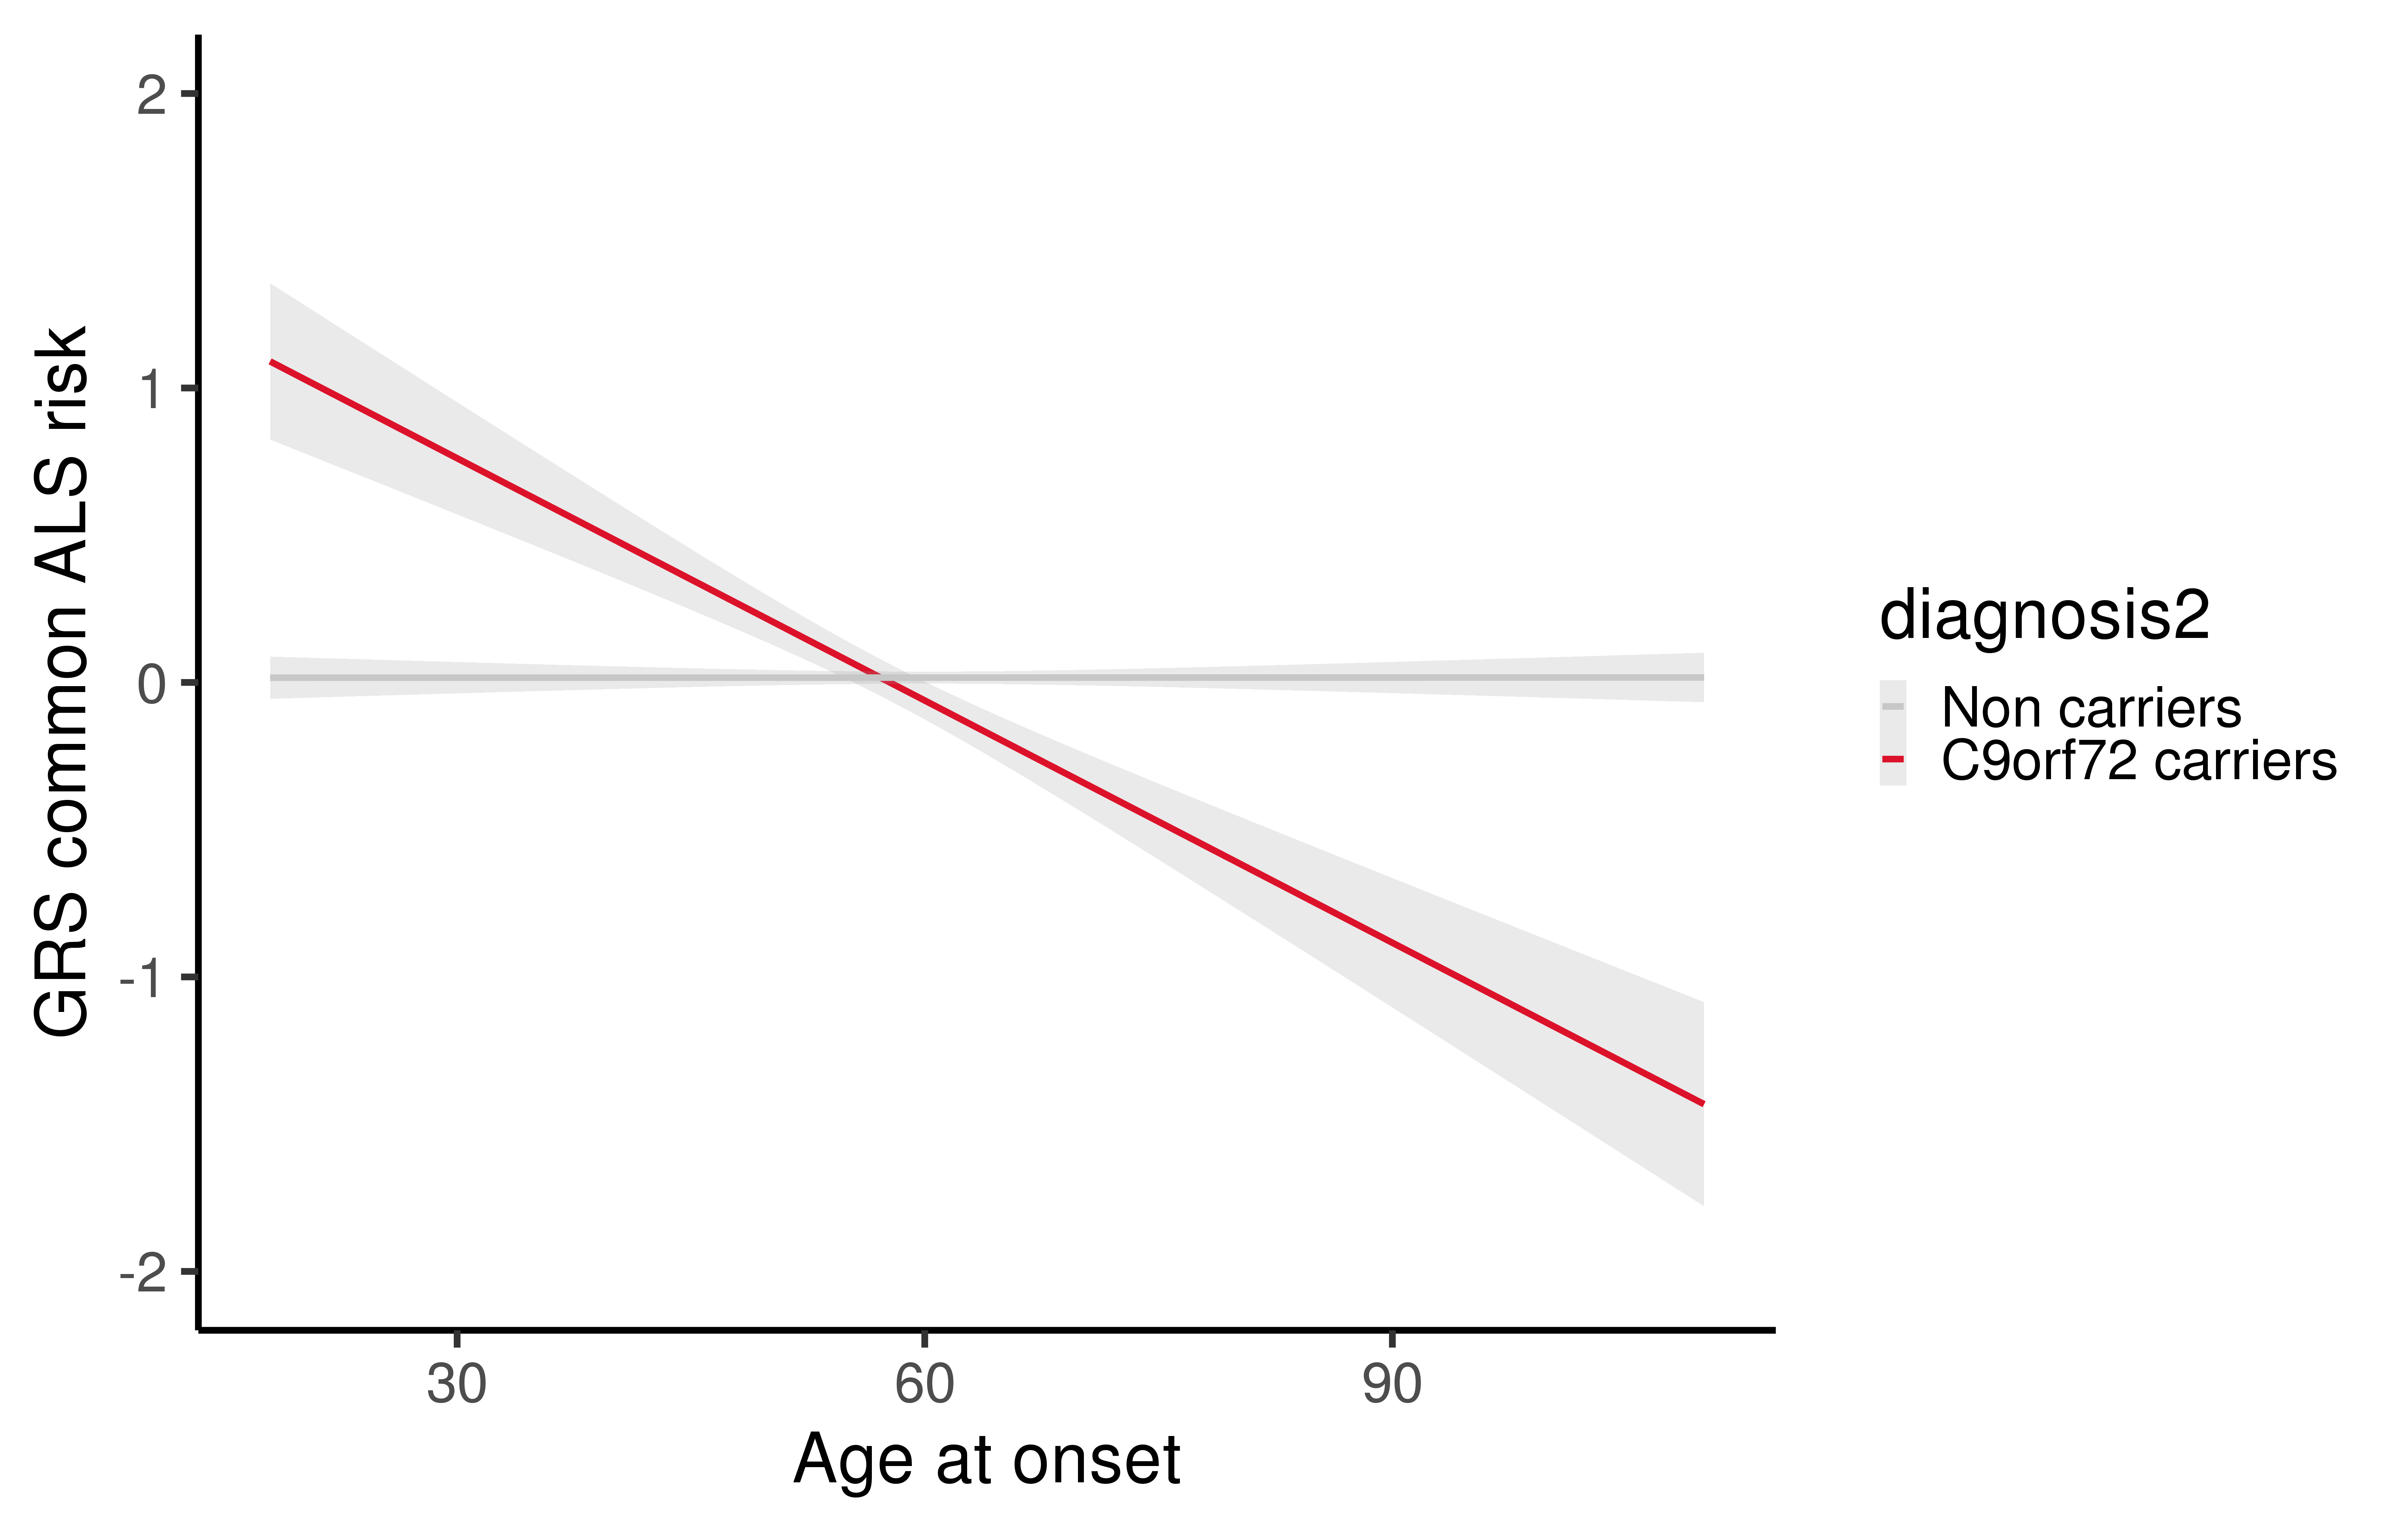

In [16]:

from IPython.display import Image
Image(filename="/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/DECILE10.updated.LinealRegressioplot.Merged.AAO.162.1.1.png")

In [3]:
%%bash

module load R/4.0.0
R --vanilla --no-save
require(dplyr)
require(tidyverse)
require(ggplot2)
require(data.table)
require(RColorBrewer)
setwd("Merged.toPLOT.LOCAL.2021-04-11.GRS")




############################################# OPEN .PROFILE AND COVARIATES FILES ##################################################

profile= read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/LOO.161snps.C9carriers.AAO.tab.decile1.toscore.txt.deciles.txt.profile", header = T)
profile$FID_IID = profile$FID
#PHENO FILE 
pheno = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
dim(pheno)





#merge pheno with profile
data = merge(profile,pheno, by= "FID_IID")


table(data$diagnosis3)
table(data$diagnosis2)
#Case_EXP, Case_WT, Control_EXP, Control_WT
table(data$diagnosis4)

dim(data)
data$PHENO = data$PHENO.x

# REGRESSION C9ORF72CARRIERS using GRS without C9orf72
#dataCARRIERS = filter (data, diagnosis2 == "Case_EXP" |diagnosis2 == "Control_WT" | diagnosis2 == "Control_EXP")



table(data$diagnosis3)
table(data$diagnosis2)
table(data$diagnosis4)


# from now, control includes all controls (it means 1 exp control)

data <- data %>% mutate (diagnosis5 = ifelse(diagnosis2 == "Case_EXP", "Case_EXP", 
                                                        ifelse(diagnosis2 == "Case_WT", "Case_WT",
                                                               ifelse(diagnosis3 == "Control", "Control","no"))))
                                                                 



data3groups = filter(data, diagnosis5 == "Case_EXP" |diagnosis5 == "Case_WT" | diagnosis5 == "Control")

dim(data3groups)

data3groups = filter(data3groups, age_at_onset > 1)
dim(data3groups)

data3groups$CASE <- data3groups$PHENO - 1
meanControls <- mean(data3groups$SCORE[data3groups$CASE == 0])
sdControls <- sd(data3groups$SCORE[data3groups$CASE == 0])
data3groups$SCOREZ <- (data3groups$SCORE - meanControls)/sdControls





dataplot = filter(data3groups, diagnosis2 == "Case_EXP"  | diagnosis2 == "Case_WT")



      p = ggplot(dataplot, aes(x=age_at_onset, y= SCOREZ, colour= diagnosis2)) 
      
      p1 = p + geom_point(alpha = 0, size = 0.8)+ stat_smooth(method=lm, fullrange = T, 
      level=0.90, alpha = 1/5, size=2)  
      p3 = p1 + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), axis.line = element_line(colour = "black")) 
              
p2 = p3 + scale_color_manual(values=c('#c7c7c7', '#9ec9cf'), breaks=c("Case_WT","Case_EXP"), 
labels=c("Non carriers", "C9orf72 carriers")) 

p4 = p2  + theme_classic(base_size = 45) + coord_cartesian(ylim = c(-2, 2)) +
ylab("GRS common ALS risk") + xlab("Age at onset") 
#ggsave(filename = "/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/DECILE1.updated.LinealRegressioplot.Merged.AAO.162.1.1.png", 
#width = 55, height = 35, dpi = 300, units = "cm", plot = p4)




[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn0912 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.17.1.1  on cn0912 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.0 



R version 4.0.0 (2020-04-24) -- "Arbor Day"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> require(dplyr)


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
package ‘dplyr’ was built under R version 4.0.3 
Loading required package: tidyverse


> require(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.0
✔ readr   2.1.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: package ‘ggplot2’ was built under R version 4.0.3 
2: package ‘tibble’ was built under R version 4.0.3 
3: package ‘tidyr’ was built under R version 4.0.5 
4: package ‘readr’ was built under R version 4.0.3 


> require(ggplot2)
> require(data.table)


Loading required package: data.table

Attaching package: ‘data.table’

The following object is masked from ‘package:purrr’:

    transpose

The following objects are masked from ‘package:dplyr’:

    between, first, last

Warning message:
package ‘data.table’ was built under R version 4.0.3 
Loading required package: RColorBrewer


> require(RColorBrewer)
> setwd("Merged.toPLOT.LOCAL.2021-04-11.GRS")
> 
> 
> 
> 
> ############################################# OPEN .PROFILE AND COVARIATES FILES ##################################################
> 
> profile= read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2020-12-2.GRS/Data/LOO/LOO.161snps.C9carriers.AAO.tab.decile1.toscore.txt.deciles.txt.profile", header = T)
> profile$FID_IID = profile$FID
> #PHENO FILE 
> pheno = read.table("/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021-03-26.MergingDatasets/PCs/UPDATED.COV.ALSplusALSFTD.C9.txt", header = T)
> dim(pheno)
[1] 42090    38
> 
> 
> 
> 
> 
> #merge pheno with profile
> data = merge(profile,pheno, by= "FID_IID")
> 
> 
> table(data$diagnosis3)

   Case Control 
   7854   34236 
> table(data$diagnosis2)

   Case_EXP     Case_WT Control_EXP  Control_WT 
        817        7037           1       34235 
> #Case_EXP, Case_WT, Control_EXP, Control_WT
> table(data$diagnosis4)

    ALS Control     FTD 
   7703   342

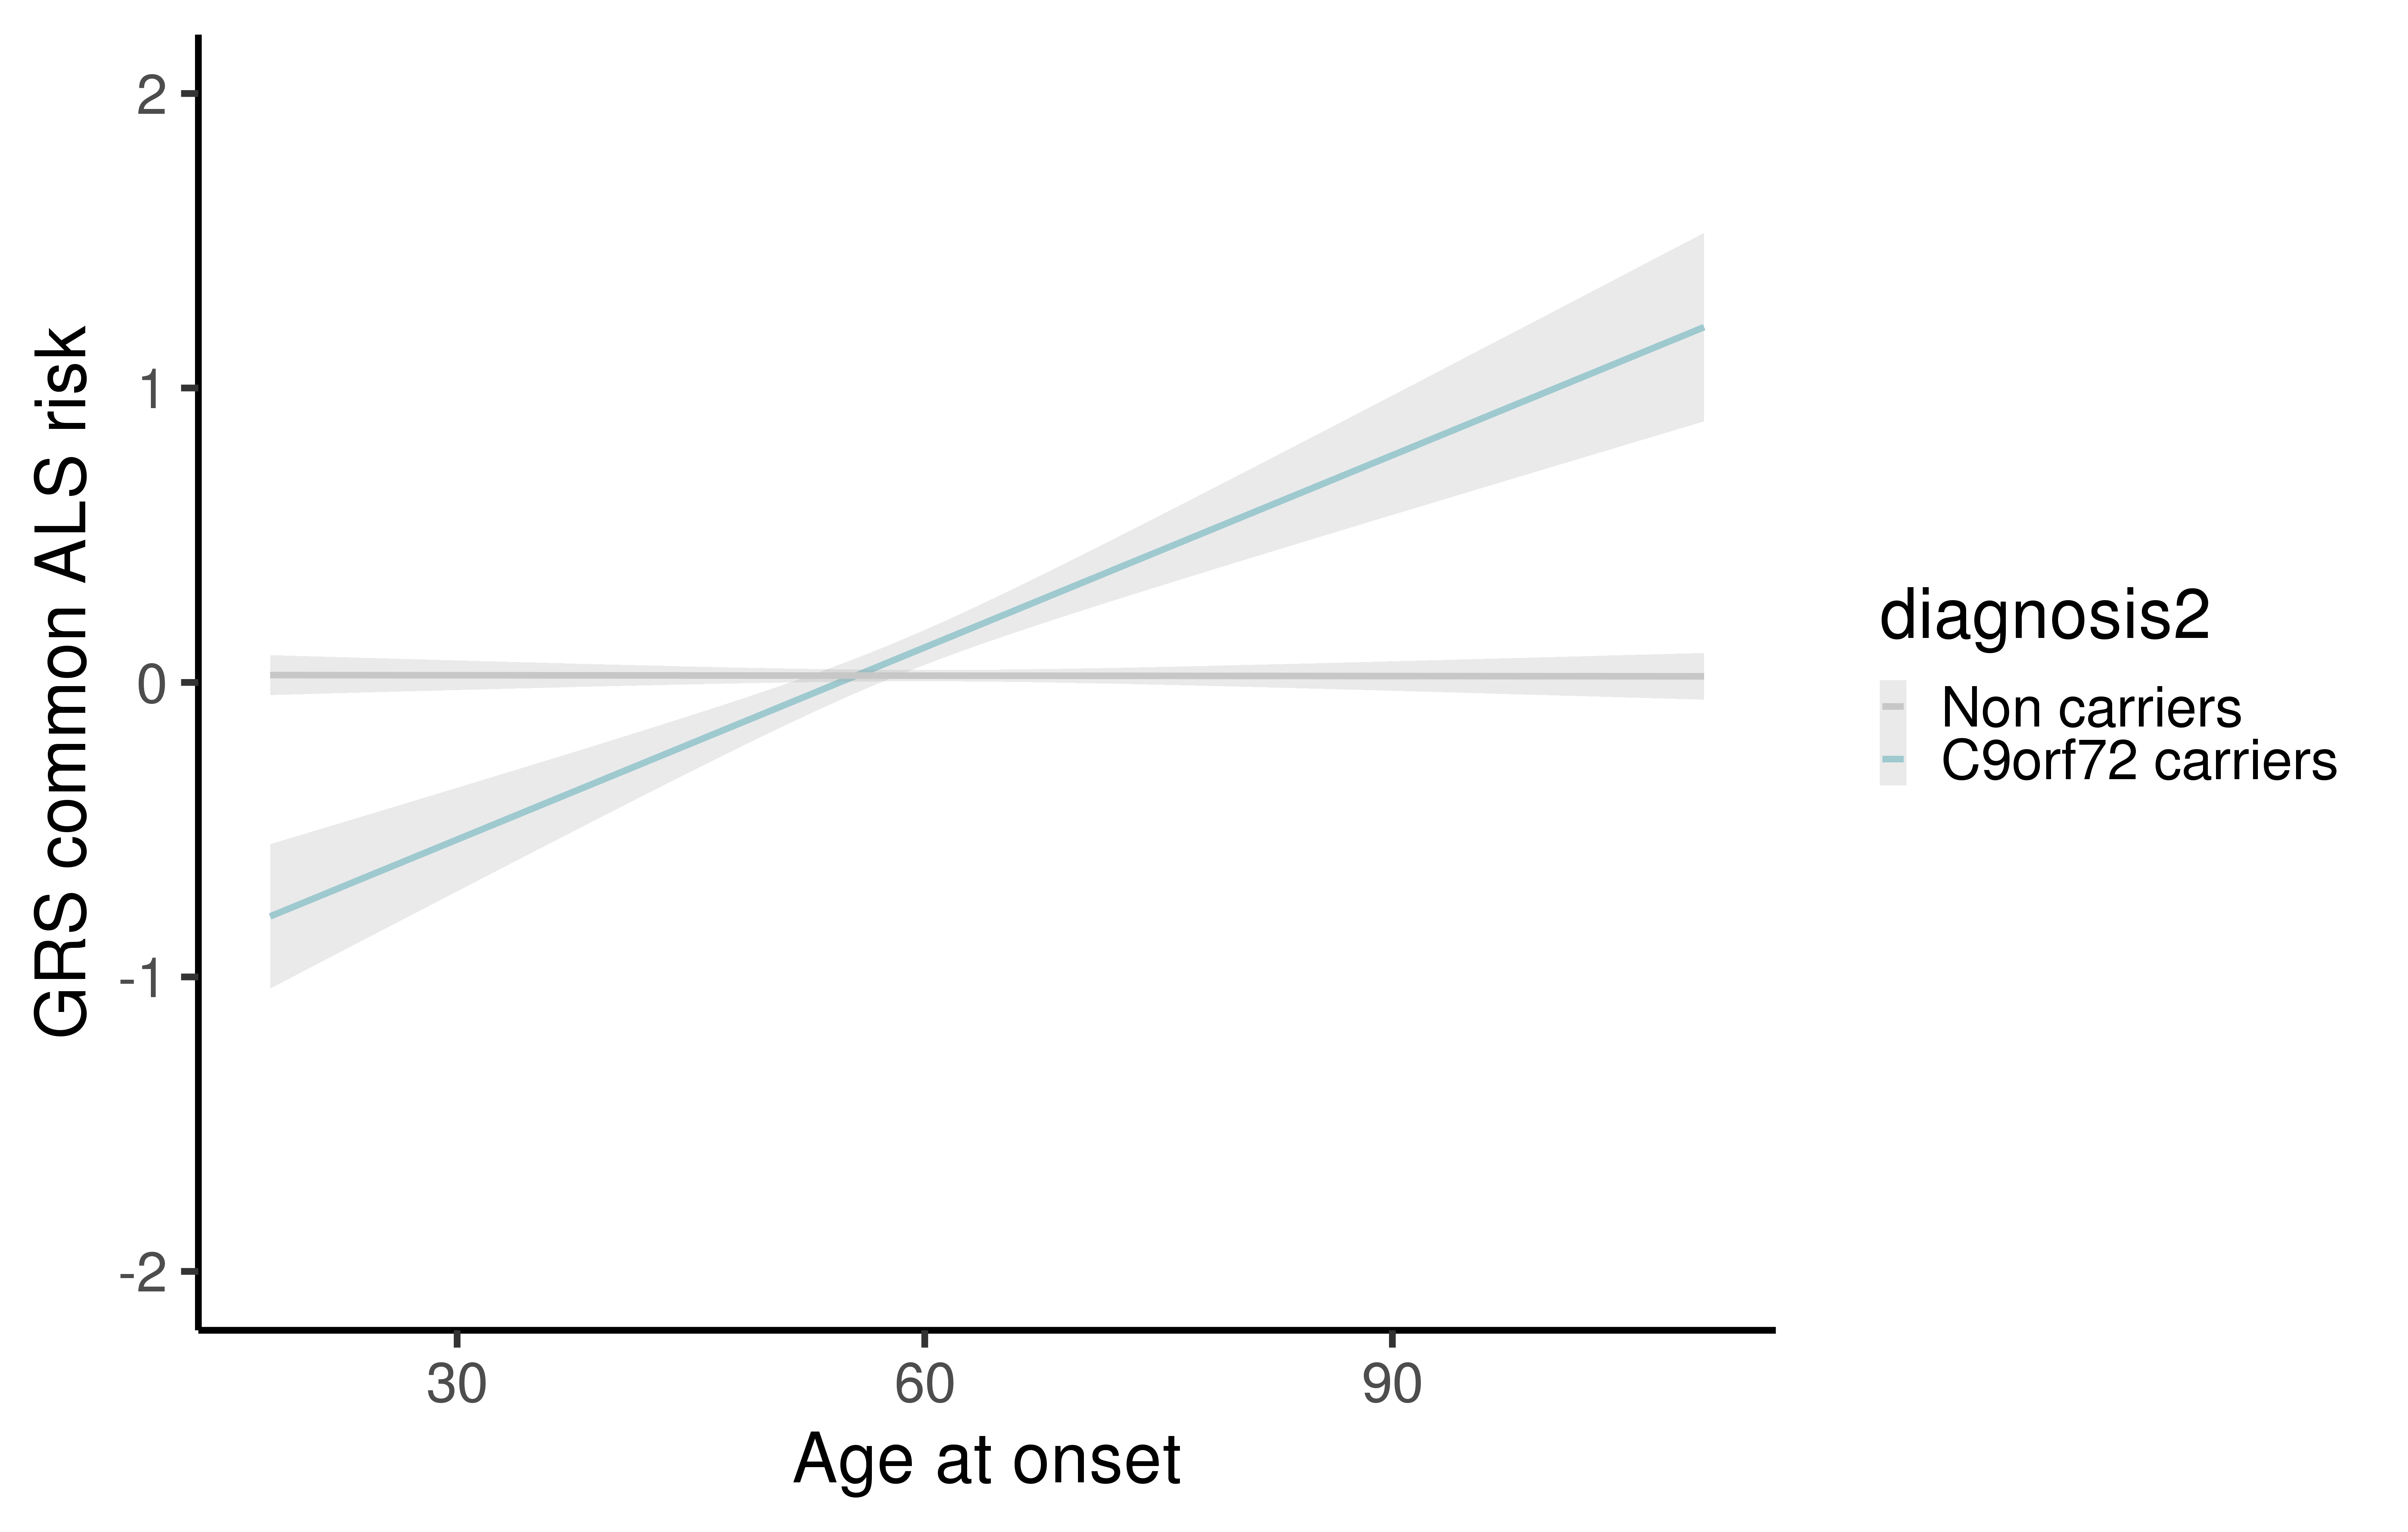

In [18]:

from IPython.display import Image
Image(filename="/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/DECILE1.updated.LinealRegressioplot.Merged.AAO.162.1.1.png")